Import Libraries

In [29]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Reading Dataset

In [6]:
# Verinin kopyasını oluşturarak rastgele 5 veriyi görelim.

data = pd.read_csv(r"D:\Download\Task-1\House Price Prediction\Housing.csv")
df = data.copy()
df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
93,6300000,7200,3,2,1,yes,no,yes,no,yes,3,no,semi-furnished
231,4690000,4320,3,1,1,yes,no,no,no,no,0,yes,semi-furnished
135,5775000,6000,3,2,4,yes,no,no,no,yes,0,no,unfurnished
271,4340000,1905,5,1,2,no,no,yes,no,no,0,no,semi-furnished
103,6195000,6350,3,2,3,yes,yes,no,no,yes,0,no,furnished


EDA

In [7]:
# Veri bilgisi.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
# Veri istatistikleri.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [30]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [31]:
data.shape

(545, 13)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [33]:
# Checking Null Values
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [34]:
# Pulling non-numeric data
data_columns = []
for i in data.columns:
    if data[i].values.dtype == "object" :
        data_columns.append(i)
print(data_columns)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [35]:
# Converting object data to numeric data
def binary_map(x):
    if x.name == 'furnishingstatus':
        return x.map({'furnished': 0, 'semi-furnished': 1, 'unfurnished': 2})
    return x.map({'yes': 1, 'no': 0})

data[data_columns] = data[data_columns].apply(binary_map)
data[data_columns]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,1,0,0,0,1,1,0
1,1,0,0,0,1,0,0
2,1,0,1,0,0,1,1
3,1,0,1,0,1,1,0
4,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...
540,1,0,1,0,0,0,2
541,0,0,0,0,0,0,1
542,1,0,0,0,0,0,2
543,0,0,0,0,0,0,0


In [25]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
# Veriler arasındaki korelasyonu görelim.

df.corr(numeric_only=True)

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


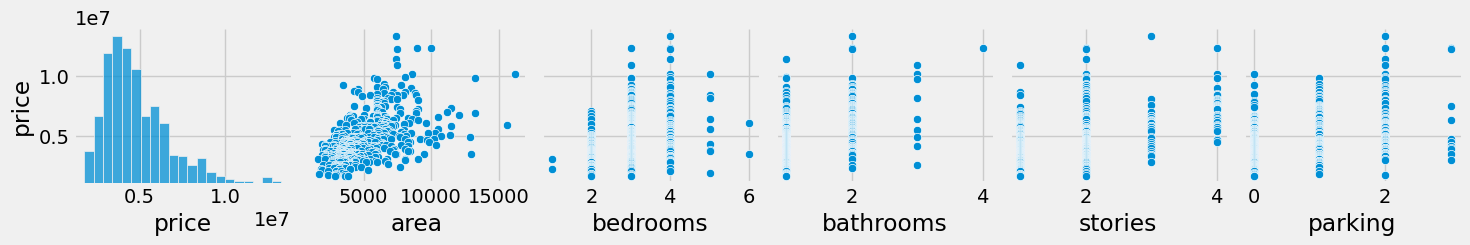

In [26]:
# Visualize the relationship between 'price' and other numeric features in the data
sns.pairplot(data, y_vars=['price'])

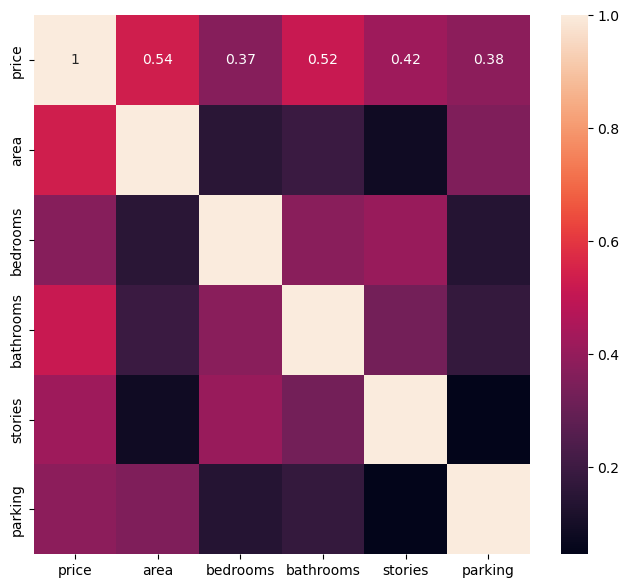

In [12]:
# Verileri arasındaki korelasyonu heatmap grafiği ile görelim.

plt.figure(figsize=(8,7))
sns.heatmap(df.corr(numeric_only=True), annot=True);

In [13]:
# Veriler arasında korelasyonu fiyata göre sıralamak istersek.

df.corr(numeric_only=True)["price"].sort_values(ascending=False)

price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64

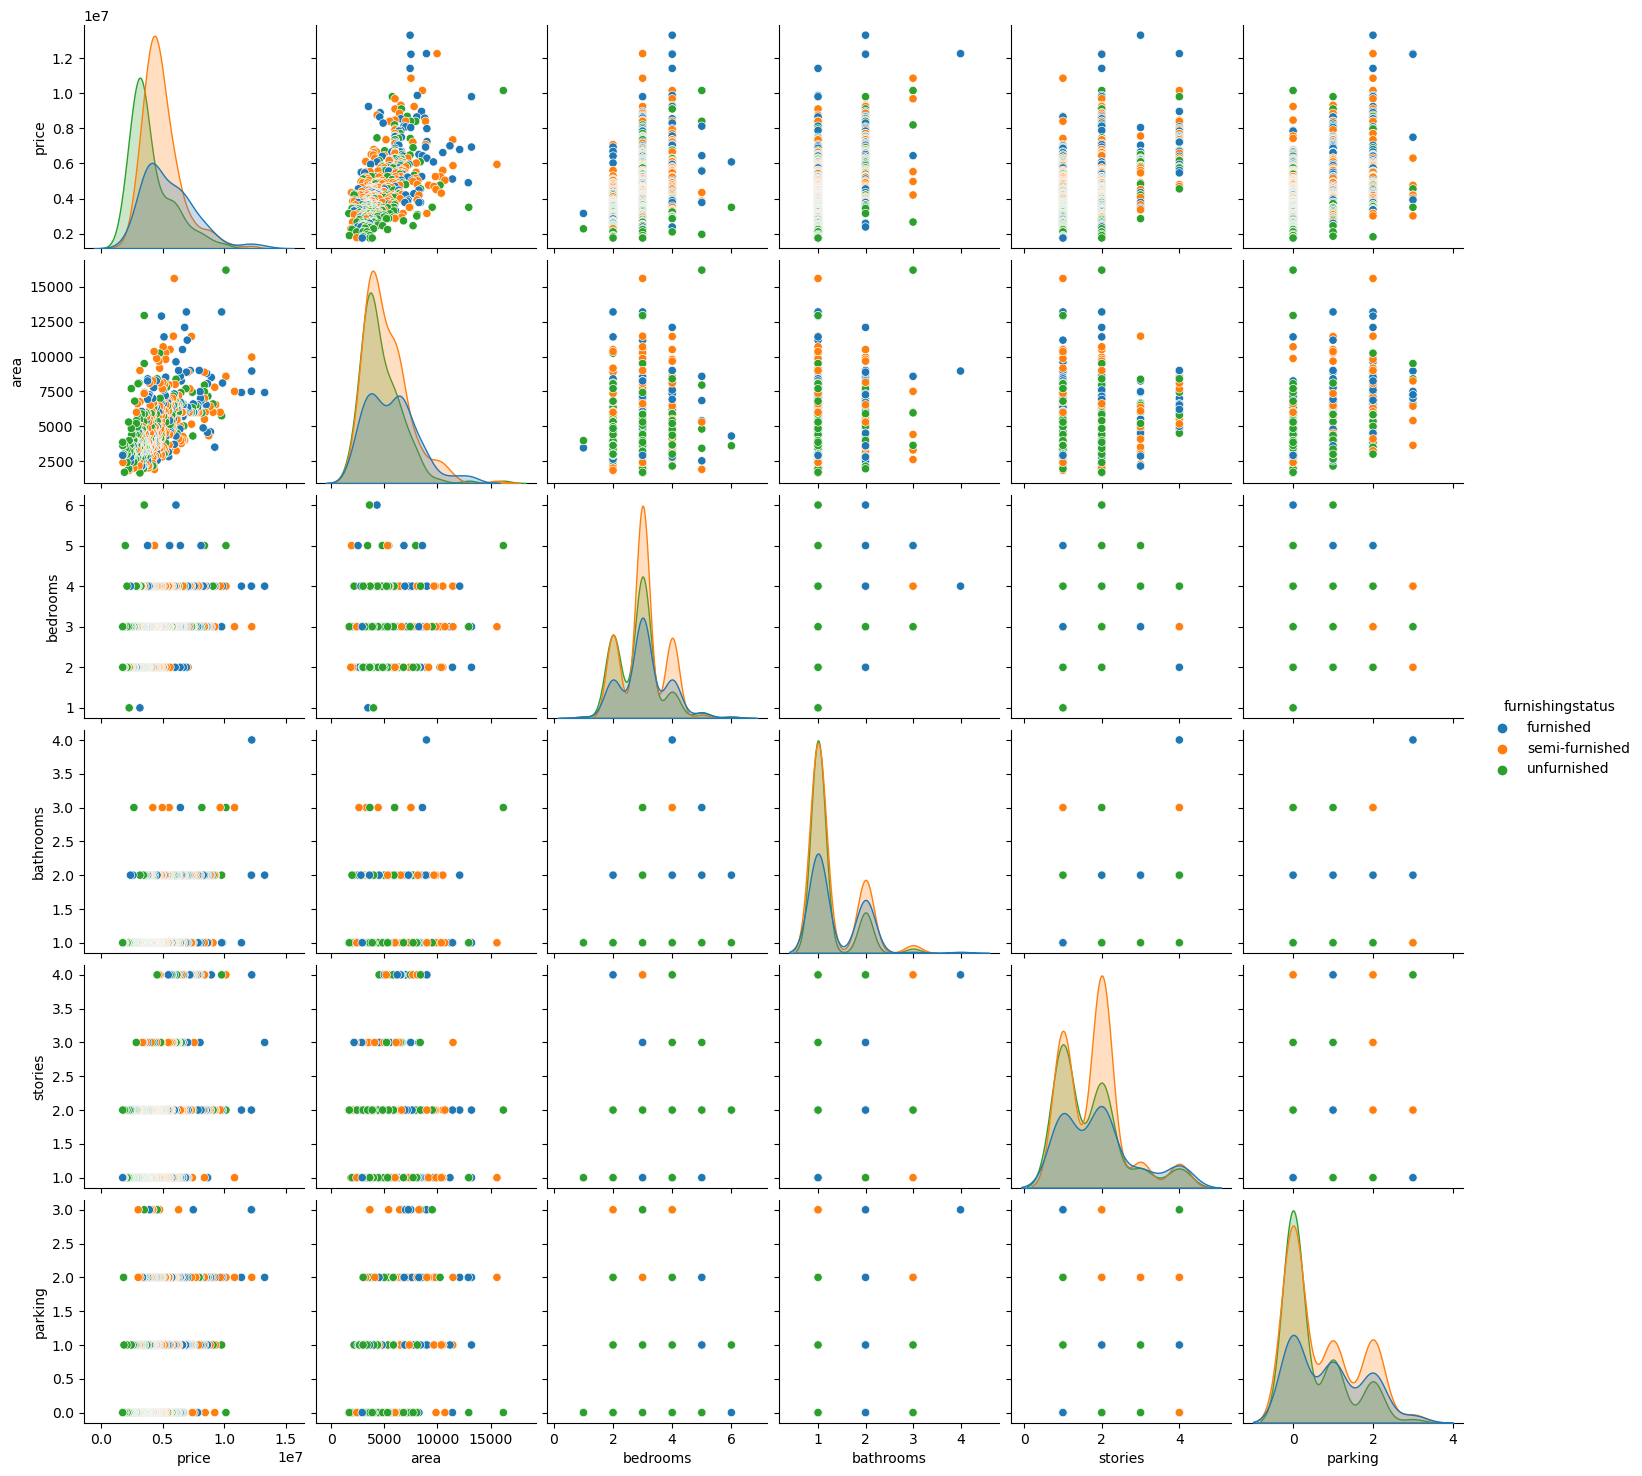

In [14]:
# Pairplot grafiği

sns.pairplot(df,hue="furnishingstatus")

In [15]:
# Şimdi pd.get_dummies yöntemini kullanakar veri setinin içerisindeki kategorik verileri sayısay ifadelere dönüşüteceğiz.

df = pd.get_dummies(df,columns=['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], dtype=int, drop_first=True)
df.head(3)

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,2,0,0,1,0,0,0,1,1
1,12250000,8960,4,4,4,3,0,0,1,0,0,0,1,0
2,12250000,9960,3,2,2,2,1,0,1,0,1,0,0,1


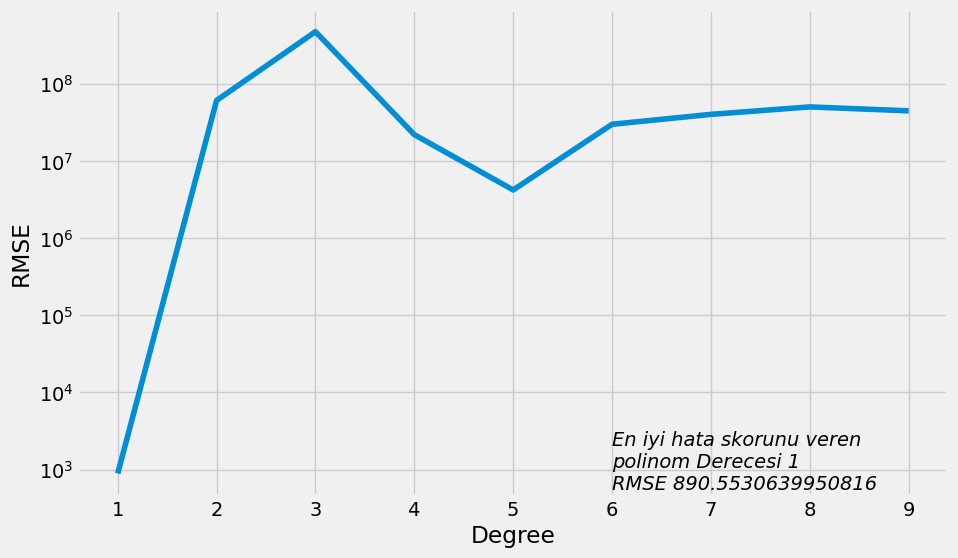

In [19]:
# Tüm polinom dereceleri için rmse skorları grafiği
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale("log")
ax.set_xlabel("Degree")
ax.set_ylabel("RMSE")
plt.text(6, 550, ("En iyi hata skorunu veren \npolinom Derecesi {} \nRMSE {}".format(min_deg, min_rmse)), style="italic")
bbox = {"facecolor":"orange", "alpha":0.4, "pad":10}

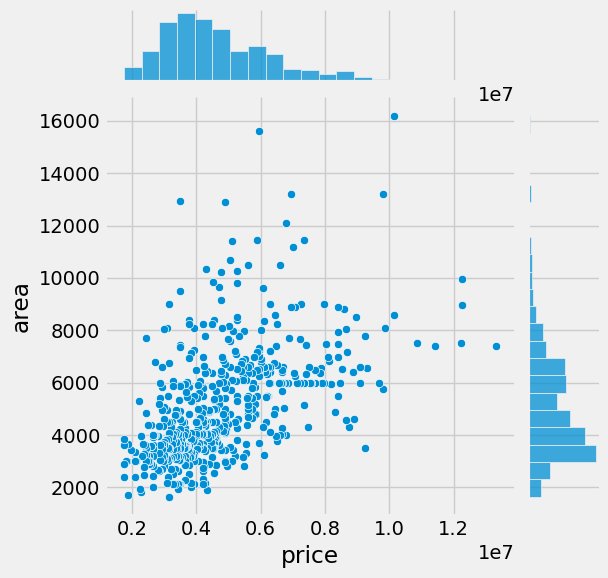

In [24]:
# Plot between columns 'price' and 'area'
sns.jointplot(x=data['price'],y=data['area'])

In [40]:
# Extracting features 
# Drop is a method of a DataFrame object that returns a new DataFrame containing the changes (here without 'price' column)

x_train = data_train.drop('price',axis=1)
y_train = data_train['price']

x_test = data_test.drop('price',axis=1)
y_test = data_test['price']

scaling_columns = x_train.columns

In [41]:
# Data scaling in the range [0, 1]
scaler = MinMaxScaler()

x_train[x_train.columns] = scaler.fit_transform(x_train[scaling_columns])
x_test[x_test.columns] = scaler.fit_transform(x_test[scaling_columns])

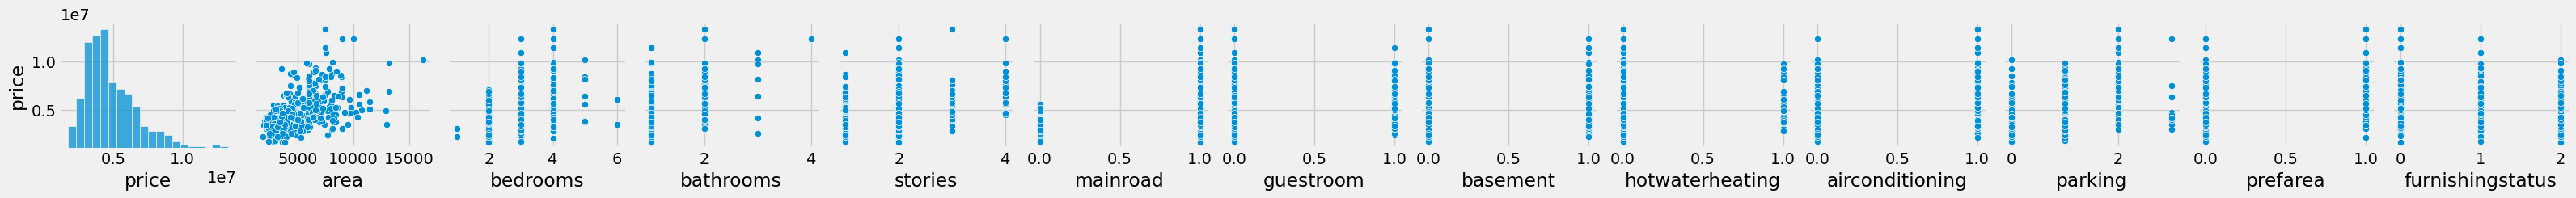

In [42]:
sns.pairplot(data_train, y_vars=['price'])

In [43]:
x_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,0.432609,0.4,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.333333,0.0,0.0
41,0.314954,0.4,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.000000,1.0,0.0
91,0.342105,0.2,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.666667,1.0,0.0
118,0.319131,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,0.0
472,0.124896,0.6,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.5


In [44]:
y_train.head()

22     8645000
41     7840000
91     6419000
118    5950000
472    3010000
Name: price, dtype: int64

In [45]:
# Ordinary least squares Linear Regression.
regression = LinearRegression()

# Fit linear model
regression.fit(x_train, y_train)

LinearRegression()

In [46]:
# Estimated coefficients for the linear regression problem. w_n
coefficients = regression.coef_
for i in range(len(coefficients)):
    print(f"w_{i} is {coefficients[i]}")

w_0 is 3470498.674769782
w_1 is 467940.7756705433
w_2 is 3416383.702185884
w_3 is 1218325.8536340531
w_4 is 575813.3574542647
w_5 is 383715.682053276
w_6 is 283176.4066270575
w_7 is 862897.0116902643
w_8 is 836787.8473545251
w_9 is 734498.9554940909
w_10 is 602828.9328677498
w_11 is -438755.2496886255


In [47]:
# Best score is 1
score = regression.score(x_train, y_train)
score

0.6773324472457776

In [48]:
prediction = regression.predict(x_test)

In [49]:
r2 = r2_score(y_test, prediction)
print(r2)

0.5898767145494923


In [50]:
y_test_metrics = y_test.values.reshape(-1,1)
data_fram = pd.DataFrame({'actual': y_test_metrics.flatten(), 'predicted': prediction.flatten()})
pd.options.display.float_format = '{:.2f}'.format
data_fram.head(10)

,actual,predicted
0,4403000,3931642.51
1,7350000,7278539.50
2,5250000,5608611.66
3,4550000,5205560.89
4,4382000,4836558.91
5,4690000,3883778.92
6,8540000,8919077.59
7,5250000,6364499.62
8,2730000,3522569.64
9,5950000,5812009.01


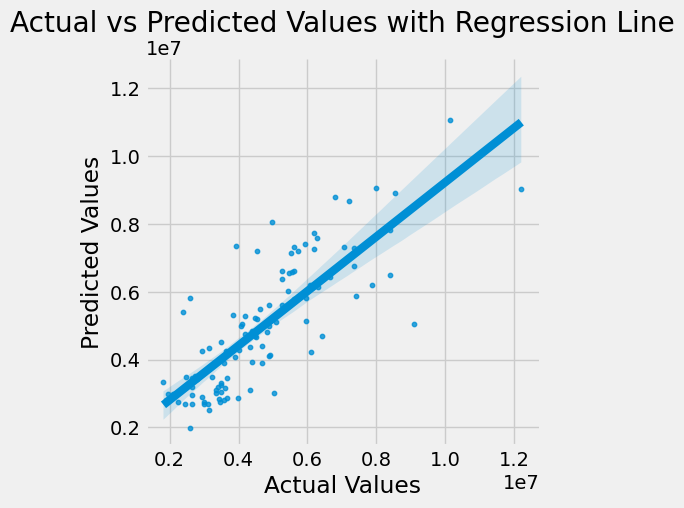

In [51]:
plot_data = pd.DataFrame({'actual': y_test_metrics.flatten(), 'predicted': prediction.flatten()})

sns.lmplot(x='actual', y='predicted', data=plot_data, scatter_kws={'s': 10})
plt.title('Actual vs Predicted Values with Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


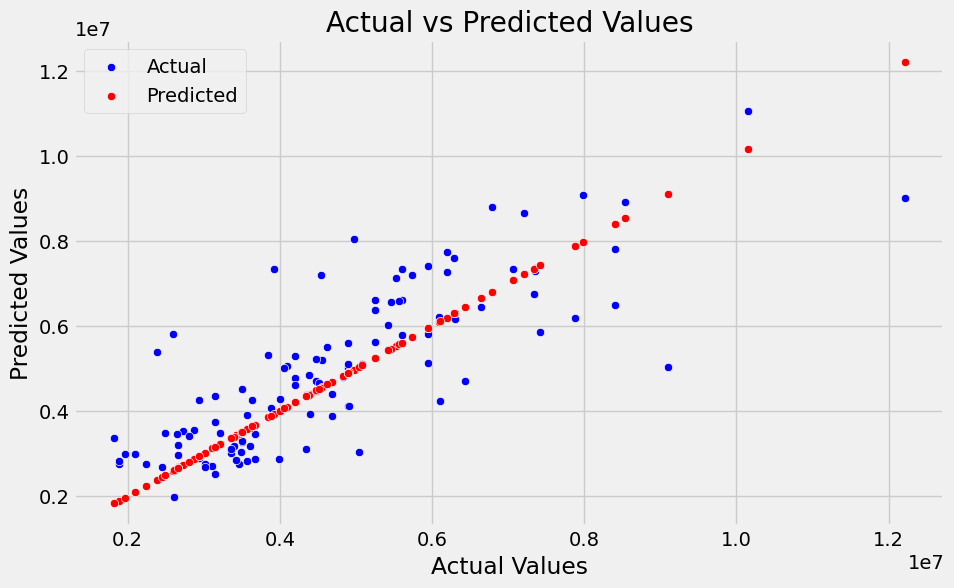

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='actual', y='predicted', data=plot_data, color='blue', label='Actual')
sns.scatterplot(x='actual', y='actual', data=plot_data, color='red', label='Predicted')

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [53]:
# Creating features
test_futures = np.array([2880, 3, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1]).reshape(1, -1)

# Scaling futers
test_futures_scaled = scaler.transform(test_futures)

# Predicting price
predicted_price = regression.predict(test_futures_scaled)
predicted_price

array([3931642.51176856])

In [57]:
import pandas as pd
import ydata_profiling as pp

In [55]:
!pip install ydata_profiling

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.4 requires pydantic<2.0, but you have pydantic 2.7.1 which is incompatible.
tensorflow-addons 0.22.0 requires typeguard<3.0.0,>=2.7, but you have typeguard 4.2.1 which is incompatible.



     ---------------------------------------- 0.0/107.3 kB ? eta -:--:--
     ------- ----------------------------- 20.5/107.3 kB 682.7 kB/s eta 0:00:01
     ------- ----------------------------- 20.5/107.3 kB 682.7 kB/s eta 0:00:01
     ---------- -------------------------- 30.7/107.3 kB 217.9 kB/s eta 0:00:01
     ---------- -------------------------- 30.7/107.3 kB 217.9 kB/s eta 0:00:01
     --------------------- --------------- 61.4/107.3 kB 233.8 kB/s eta 0:00:01
     ---------------------------------- - 102.4/107.3 kB 347.8 kB/s eta 0:00:01
     ------------------------------------ 107.3/107.3 kB 345.5 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached annotated_types-0.6.0-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/357.9 kB ? eta -:--:--
   ---- ---------------------------------- 41.0/357.9 kB 991.0 kB/s eta 0:00:01
   ------------- -------------------------

In [58]:
data = pd.read_csv(r"D:\Download\Task-1\House Price Prediction\Housing.csv")
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]